In [1]:
%reset
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from numpy import random
import datetime

import functools
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
house_files = (('house_1_avg_60.csv', 'house_1_avg_900.csv'),
               ('house_2_avg_60.csv', 'house_2_avg_900.csv'),
               ('house_3_avg_60.csv', 'house_3_avg_900.csv'),
               ('house_4_avg_60.csv', 'house_4_avg_900.csv'),
               ('house_5_avg_60.csv', 'house_5_avg_900.csv'),
               ('house_6_avg_60.csv', 'house_6_avg_900.csv'))

In [3]:
first_house = 'houses/house_3_avg_900.csv'

In [4]:
act_df = pd.read_table(first_house, parse_dates=True,
                       header=0,
                       index_col=0,
                       sep=",",
                       decimal=".")
act_df = act_df.fillna(0)
act_df.head(2)

,1mains,2mains,3outlets_unknown,4outlets_unknown,5lighting,6electronics,7refrigerator,8disposal,9dishwaser,10furance,...,13washer_dryer,14washer_dryer,15lighting,16microwave,17lighting,18smoke_alarms,19lighting,20bathroom_gfi,21kitchen_outlets,22kitchen_outlets
0date,,,,,,,,,,,,,,,,,,,,,
2011-04-16 05:00:00,184.703474,580.796948,1.589286,0.0,1.000000,128.892857,117.839286,0.0,0.339286,4.821429,...,0.0,0.0,1.000000,2.0,194.982143,1.589286,23.107143,0.0,0.0,0.0
2011-04-16 05:15:00,183.655402,506.546782,0.823529,0.0,0.323529,128.220588,37.955882,0.0,0.102941,4.941176,...,0.0,0.0,0.985294,2.0,194.897059,1.750000,23.058824,0.0,0.0,0.0


In [5]:
#for column in act_df.columns[:2]:
#    for index, data in act_df[column].iteritems():
#        print(index)
#for index, row in act_df.iterrows():
#    print(row.name)

In [6]:
def custom_transpose(orig_frame, columns_sel):
    time_cols = [x.strftime('%H:%M') for x in pd.date_range("00:00", "23:59", freq="15min")]
    output_frames = [pd.DataFrame(columns=time_cols)]*len(columns_sel)
    
    for column_id, column in enumerate(columns_sel):
        for row_id, row in orig_frame.iterrows():
            
            timestamp = row.name
            act_date = timestamp.strftime('%Y.%m.%d')
            
            if act_date not in output_frames[column_id].index:
                
                empty_frame = pd.DataFrame(np.nan, index=[act_date], columns=time_cols)
                output_frames[column_id] = output_frames[column_id].append(empty_frame)
            column_found = timestamp.strftime('%H:%M')
            #print(output_frames[column_id])
            output_frames[column_id].loc[act_date][column_found] = row[column]
    return output_frames

In [7]:
columns_to_transpose = act_df.columns[2:]
devices = custom_transpose(act_df, columns_to_transpose)
for device in devices:
    device.index = pd.to_datetime(device.index)

In [8]:
device_pairs = list(zip(columns_to_transpose, devices))

for file_name, device_hourly_table in device_pairs:
    device_hourly_table.to_csv('{0}.csv'.format(file_name))



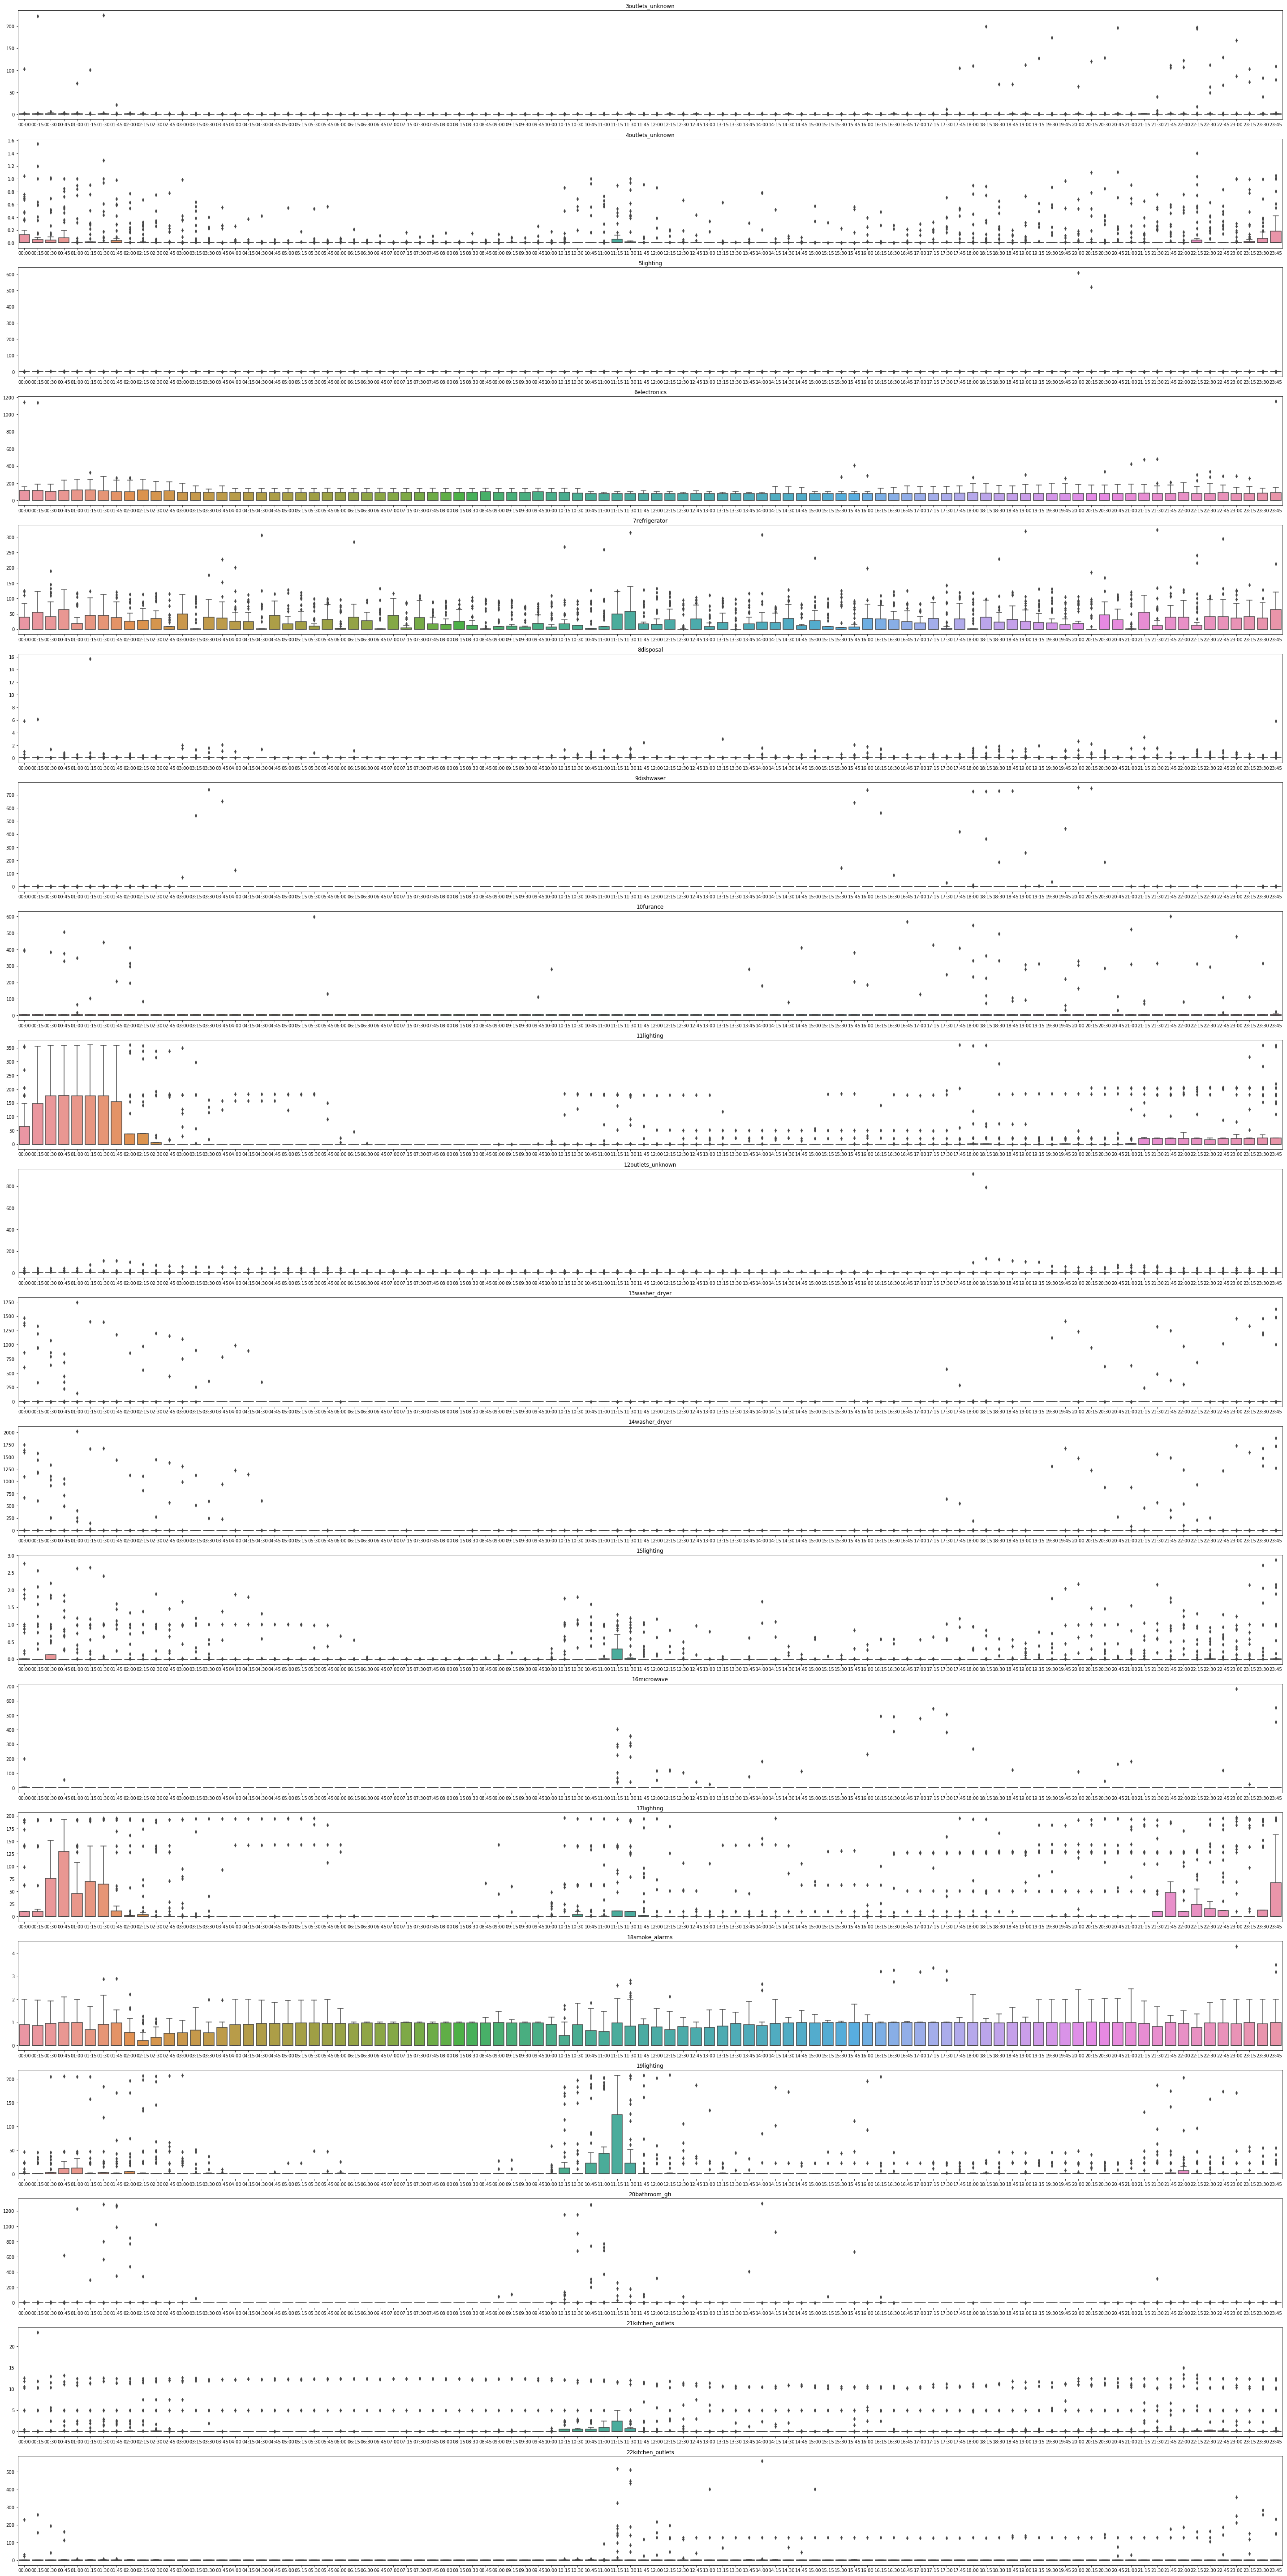

In [9]:
plt.rcParams['figure.figsize']=(40,80)
#order_nr = 2
#print(device_pairs[order_nr][0])
#ax = sns.boxplot( data=device_pairs[order_nr][1])
channel_count = len(device_pairs)

f, ax_arr = plt.subplots(channel_count)

for channel_nr in range(channel_count):
    sns.boxplot(data=device_pairs[channel_nr][1], ax=ax_arr[channel_nr]).set_title(device_pairs[channel_nr][0])
f.tight_layout()